
# **Projeto ATD**
## 2ºsemestre 2020/2021
### FCTUC - DEI
### Membros:
* Joel Oliveira
* Tomás Mendes
* ?


In [9]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Ler dados do acelerómetro para variável
### 1 variável por experiência

In [10]:
user1_1 = pd.DataFrame(data = np.loadtxt("DataPL/acc_exp01_user01.txt"), columns = ['X','Y','Z'])
user1_2 = pd.DataFrame(data = np.loadtxt("DataPL/acc_exp02_user01.txt"), columns = ['X','Y','Z'])
user2_2 = pd.DataFrame(data = np.loadtxt("DataPL/acc_exp03_user02.txt"), columns = ['X','Y','Z'])
user2_2 = pd.DataFrame(data = np.loadtxt("DataPL/acc_exp04_user02.txt"), columns = ['X','Y','Z'])
user3_1 = pd.DataFrame(data = np.loadtxt("DataPL/acc_exp05_user03.txt"), columns = ['X','Y','Z'])
user3_2 = pd.DataFrame(data = np.loadtxt("DataPL/acc_exp06_user03.txt"), columns = ['X','Y','Z'])
user4_1 = pd.DataFrame(data = np.loadtxt("DataPL/acc_exp07_user04.txt"), columns = ['X','Y','Z'])
user4_2 = pd.DataFrame(data = np.loadtxt("DataPL/acc_exp08_user04.txt"), columns = ['X','Y','Z'])

In [11]:
np.loadtxt("DataPL/acc_exp01_user01.txt")

array([[ 0.91805559, -0.1125    ,  0.50972225],
       [ 0.91111113, -0.09305556,  0.53750004],
       [ 0.8819445 , -0.08611111,  0.51388893],
       ...,
       [-0.05138889,  0.51666666,  0.95694447],
       [-0.06111112,  0.52500001,  0.95694447],
       [-0.04861111,  0.54444445,  0.94722222]])

In [12]:
user1_1

,X,Y,Z
0,0.918056,-0.112500,0.509722
1,0.911111,-0.093056,0.537500
2,0.881944,-0.086111,0.513889
3,0.881944,-0.086111,0.513889
4,0.879167,-0.100000,0.505556
...,...,...,...
20593,-0.069444,0.531944,0.806944
20594,-0.061111,0.519444,0.919444
20595,-0.051389,0.516667,0.956944
20596,-0.061111,0.525000,0.956944


In [13]:
user1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20598 entries, 0 to 20597
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       20598 non-null  float64
 1   Y       20598 non-null  float64
 2   Z       20598 non-null  float64
dtypes: float64(3)
memory usage: 482.9 KB


In [14]:
user1_1.describe()

,X,Y,Z
count,20598.000000,20598.000000,20598.000000
mean,0.880673,-0.101714,0.097088
std,0.346449,0.340091,0.285555
min,-0.647222,-1.209722,-0.676389
25%,0.805556,-0.285764,-0.081944
50%,0.981945,-0.202778,-0.004167
75%,1.019445,-0.031944,0.204167
max,1.950000,1.036111,1.269444


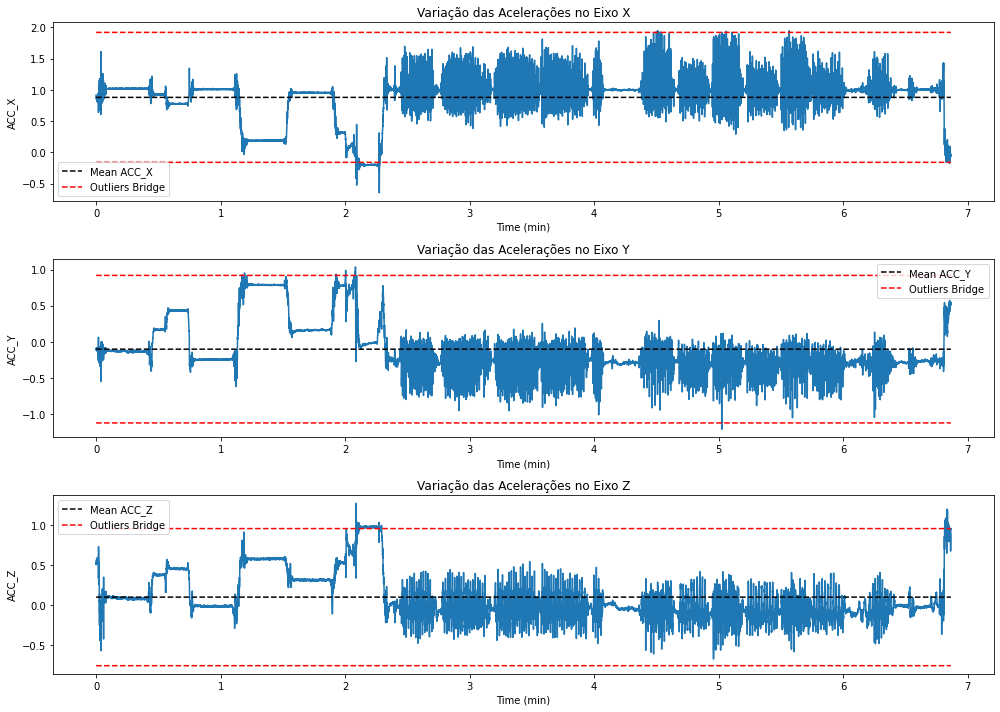

In [15]:
freq = 50
T = 1/freq
seg = np.arange(0, len(user1_1['X']) * T, T)
minuts = seg/60

plt.figure(figsize=(14,10))

plt.subplot(311)
plt.plot( minuts  , user1_1['X'])
meanfig, = plt.plot(minuts, np.full(len(minuts), user1_1['X'].mean()),'--', c='black')
meanfig.set_label("Mean ACC_X")
plt.plot(minuts, np.full(len(minuts), user1_1['X'].mean() + 3*user1_1['X'].std()),'--', c='red')
outfig, = plt.plot(minuts, np.full(len(minuts), user1_1['X'].mean() - 3*user1_1['X'].std()),'--', c='red')
outfig.set_label("Outliers Bridge")
plt.xlabel("Time (min)")
plt.ylabel("ACC_X")
plt.title("Variação das Acelerações no Eixo X")
plt.legend()

plt.subplot(312)
plt.plot( minuts  , user1_1['Y'])
meanfig, = plt.plot(minuts, np.full(len(minuts), user1_1['Y'].mean()),'--', c='black')
meanfig.set_label("Mean ACC_Y")
outfig,= plt.plot(minuts, np.full(len(minuts), user1_1['Y'].mean() + 3*user1_1['Y'].std()),'--', c='red')
outfig.set_label("Outliers Bridge")
plt.plot(minuts, np.full(len(minuts), user1_1['Y'].mean() - 3*user1_1['Y'].std()),'--', c='red')
plt.xlabel("Time (min)")
plt.ylabel("ACC_Y")
plt.title("Variação das Acelerações no Eixo Y")
plt.legend()

plt.subplot(313)
plt.plot( minuts  , user1_1['Z'])
meanfig, = plt.plot(minuts, np.full(len(minuts), user1_1['Z'].mean()),'--', c='black')
meanfig.set_label("Mean ACC_Z")
outfig, = plt.plot(minuts, np.full(len(minuts), user1_1['Z'].mean() + 3*user1_1['Z'].std()),'--', c='red')
outfig.set_label("Outliers Bridge")
plt.plot(minuts, np.full(len(minuts), user1_1['Z'].mean() - 3*user1_1['Z'].std()),'--', c='red')
plt.xlabel("Time (min)")
plt.ylabel("ACC_Z")
plt.title("Variação das Acelerações no Eixo Z")
plt.legend()

plt.tight_layout()

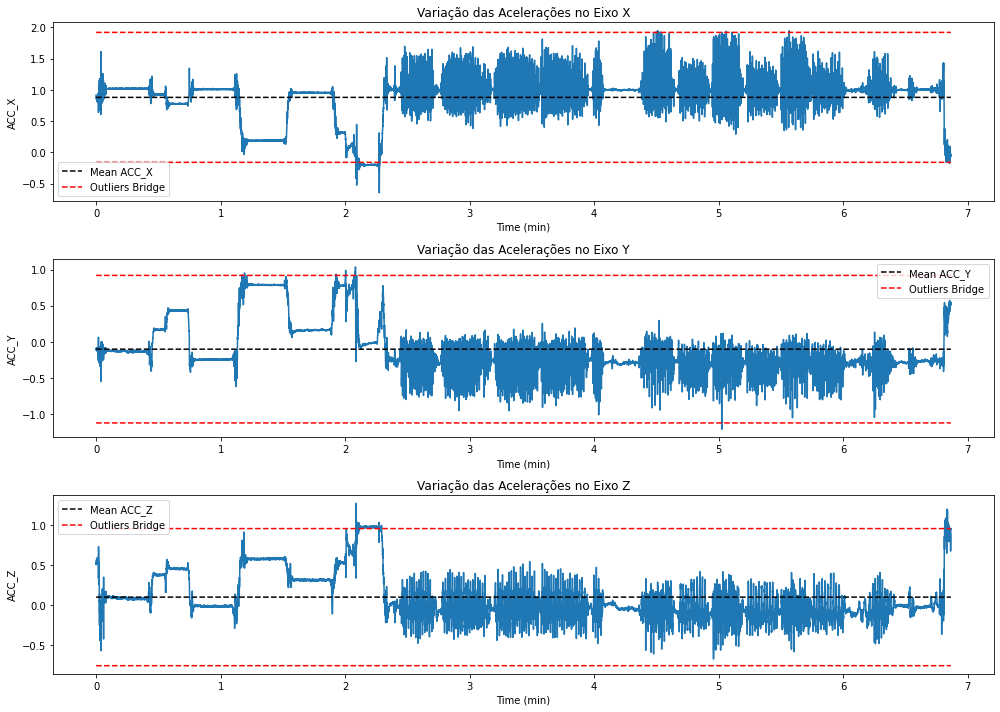

In [16]:
freq = 50
T = 1/freq
seg = np.arange(0, len(user1_1['X']) * T, T)
minuts = seg/60

plt.figure(figsize=(14,10))
plt.subplot(311)

figure = sns.lineplot(x = minuts, y='X', data = user1_1, palette = 'viridis', markers = '*' )
meanfig, = plt.plot(minuts, np.full(len(minuts), user1_1['X'].mean()),'--', c='black')
meanfig.set_label("Mean ACC_X")
outfig, = plt.plot(minuts, np.full(len(minuts), user1_1['X'].mean() + 3*user1_1['X'].std()),'--', c='red')
outfig.set_label("Outliers Bridge")
plt.plot(minuts, np.full(len(minuts), user1_1['X'].mean() - 3*user1_1['X'].std()),'--', c='red')
plt.xlabel("Time (min)")
plt.ylabel("ACC_X")
plt.title("Variação das Acelerações no Eixo X")
plt.legend()

plt.subplot(312)
figure = sns.lineplot(x = minuts, y='Y', data = user1_1, palette = 'viridis', markers = '*' )
meanfig, = plt.plot(minuts, np.full(len(minuts), user1_1['Y'].mean()),'--', c='black')
meanfig.set_label("Mean ACC_Y")
outfig, = plt.plot(minuts, np.full(len(minuts), user1_1['Y'].mean() + 3*user1_1['Y'].std()),'--', c='red')
outfig.set_label("Outliers Bridge")
plt.plot(minuts, np.full(len(minuts), user1_1['Y'].mean() - 3*user1_1['Y'].std()),'--', c='red')
plt.xlabel("Time (min)")
plt.ylabel("ACC_Y")
plt.title("Variação das Acelerações no Eixo Y")
plt.legend()

plt.subplot(313)
figure = sns.lineplot(x = minuts, y='Z', data = user1_1, palette = 'viridis', markers = '*' )
meanfig, = plt.plot(minuts, np.full(len(minuts), user1_1['Z'].mean()),'--', c='black')
meanfig.set_label("Mean ACC_Z")
outfig, = plt.plot(minuts, np.full(len(minuts), user1_1['Z'].mean() + 3*user1_1['Z'].std()),'--', c='red')
outfig.set_label("Outliers Bridge")
plt.plot(minuts, np.full(len(minuts), user1_1['Z'].mean() - 3*user1_1['Z'].std()),'--', c='red')
plt.xlabel("Time (min)")
plt.ylabel("ACC_Z")
plt.title("Variação das Acelerações no Eixo Z")
plt.legend()

plt.tight_layout()